In [75]:
import tensorflow as tf
import yfinance as yf
import pandas as pd
from datetime import datetime
from collections import Counter

In [76]:
crypto_dataset =pd.read_csv("data/archive/Cryptocurrency_Dataset_2021.csv")
crypto_dataset

,Symbol,Name,Price (Intraday),Change,% Change,Market Cap,Volume in Currency (Since 0:00 UTC),Volume in Currency (24Hr),Total Volume All Currencies (24Hr),Circulating Supply
0,BTC-USD,Bitcoin USD,"51,013.81","1,741.86",0.0374,963.866B,34.642B,34.642B,34.642B,18.894M
1,ETH-USD,Ethereum USD,"4,310.12",123.49,0.0295,511.373B,23.695B,23.695B,23.695B,118.645M
2,BNB-USD,BinanceCoin USD,579.82,10.85,0.0191,96.714B,2.376B,2.376B,2.376B,166.801M
3,USDT-USD,Tether USD,0.999563,-0.000893,-0.09%,75.981B,79.634B,79.634B,79.634B,76.014B
4,SOL1-USD,Solana USD,194.93,5.62,0.0297,59.631B,2.804B,2.804B,2.804B,305.911M
...,...,...,...,...,...,...,...,...,...,...
390,GRN-USD,GreenPower USD,0.012171,-0.001566,-11.40%,0,50,50,50,0
391,KNC-USD,KyberNetwork USD,1.5066,0.152,0.1122,0,"128,861","128,861","128,861",0
392,BONFIRE-USD,Bonfire USD,0.00000002,0,0.1971,0,"124,365","124,365","124,365",0
393,BST-USD,BlockStamp USD,0.066326,0.002342,0.0366,0,0,0,0,0


In [77]:
news = pd.read_json("data/extracted_text_data.json")
news

,source,author,title,description,url,urlToImage,publishedAt,content,Currency,paragraph,avg title sentimental,avg sentimental sentimental,avg overall sentimental,headline sentimental,sentimental,overall sentimental score
0,"{'id': 'ars-technica', 'name': 'Ars Technica'}",Kyle Orland,No one needs this cryptocurrency-powered Steam...,"Playtron's SuiPlay0X1 is a ""web3 gaming"" fever...",https://arstechnica.com/gaming/2024/04/no-one-...,https://cdn.arstechnica.net/wp-content/uploads...,2024-04-11T19:53:57Z,"Enlarge/ Look, a generic render that looks vag...",None,"[Front page layout, Site theme, Kyle Orland-Ap...",0,0.047619,0.000000,"[[{'label': 'neutral', 'score': 0.999871253967...","[[{'label': 'neutral', 'score': 0.999885678291...","[[{'label': 'neutral', 'score': 0.941238164901..."
1,"{'id': None, 'name': 'ReadWrite'}",Arslan Butt,"Most Trending Cryptocurrency Today – Ethena, M...",Today’s most trending cryptocurrency list on C...,https://readwrite.com/most-trending-cryptocurr...,https://readwrite.com/wp-content/uploads/2024/...,2024-04-06T03:05:48Z,Today’s most trending cryptocurrency list on C...,"[[Bitcoin, 1], [Ethereum, 1], [Solana, 1], [Do...",[Arslan Butt graduated from the University of ...,0,0.125000,0.312500,"[[{'label': 'neutral', 'score': 0.999875187873...","[[{'label': 'neutral', 'score': 0.999868512153...","[[{'label': 'positive', 'score': 0.99944609403..."
2,"{'id': None, 'name': 'ReadWrite'}",Radek Zielinski,Venezuela bets on Tether cryptocurrency to ski...,As the United States reimposes oil sanctions o...,https://readwrite.com/venezuela-bets-on-tether...,https://readwrite.com/wp-content/uploads/2024/...,2024-04-23T09:41:02Z,As the United States reimposes oil sanctions o...,"[[Tether, 1]]",[Radek Zielinski is an experienced technology ...,0,0.115385,0.000000,"[[{'label': 'neutral', 'score': 0.995628714561...","[[{'label': 'neutral', 'score': 0.999857902526...","[[{'label': 'neutral', 'score': 0.591421365737..."
3,"{'id': 'ars-technica', 'name': 'Ars Technica'}",Ashley Belanger,Crypto influencer guilty of $110M scheme that ...,Fraudster charged with crypto market manipulat...,https://arstechnica.com/tech-policy/2024/04/no...,https://cdn.arstechnica.net/wp-content/uploads...,2024-04-19T16:31:21Z,8\r\nA jury has unanimously convicted Avi Eise...,"[[Divi, 1]]","[Front page layout, Site theme, Ashley Belange...",-1,-0.055556,-0.125000,"[[{'label': 'negative', 'score': 0.90473520755...","[[{'label': 'neutral', 'score': 0.999885678291...","[[{'label': 'positive', 'score': 0.97910600900..."
4,"{'id': 'bbc-news', 'name': 'BBC News'}",https://www.facebook.com/bbcnews,Drug boss ordered to hand over £3.5m,A former Trafford drug boss is told to give up...,https://www.bbc.co.uk/news/uk-england-manchest...,https://ichef.bbci.co.uk/news/1024/branded_new...,2024-04-12T15:29:45Z,"A former global drug ring boss who lived a ""la...",None,"[A former global drug ring boss who lived a ""l...",0,-0.073171,-0.142857,"[[{'label': 'neutral', 'score': 0.997978866100...","[[{'label': 'negative', 'score': 0.97389322519...","[[{'label': 'negative', 'score': 0.78786081075..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,"{'id': None, 'name': 'Quartz India'}",Vinamrata Chaturvedi,Bitcoin is rebounding after a rollercoaster ri...,"After falling by almost 10% over the weekend, ...",https://qz.com/bitcoin-hong-kong-etf-1851410344,"https://i.kinja-img.com/image/upload/c_fill,h_...",2024-04-15T15:06:00Z,"After falling by almost 10% over the weekend, ...","[[Bitcoin, 1], [Solana, 1], [Dogecoin, 1]]",[Fund next-gen business journalism with $10 a ...,1,0.133333,-0.500000,"[[{'label': 'positive', 'score': 0.99962854385...","[[{'label': 'neutral', 'score': 0.999870538711...","[[{'label': 'negative', 'score': 0.86618179082..."
92,"{'id': None, 'name': 'Quartz India'}",Laura Bratton,Google sued scammers who put a bunch of fake i...,Google is suing two developers who put 87 fake...,https://qz.com/google-fake-apps-crypto-coinbas...

In [83]:
class stonks:
    def get_symbol(self, input_name):
        crypto_dataset_names = [name.split()[0] for name in crypto_dataset["Name"]]
        position = crypto_dataset_names.index(input_name)
        return crypto_dataset["Symbol"][position]

    def process_price():
        history = yf.download("BTC-USD", start="2024-04-06", interval="1h", period="1d")



    def get_necessary_price(self):
        col = [
            "Currency",
            "publishedAt",
            "avg title sentimental",
            "avg sentimental sentimental",
            "avg overall sentimental",
        ]
        necessary_data = [news[val] for val in col]
        currency, published, title_sen, sen, overall_sen = necessary_data


        symbol = [self.get_symbol(tik[0][0]) if tik else None for tik in currency]
        # download prices from the 60 min period
        for count, tik in enumerate(symbol):
            published_datetime = datetime.strptime(published[count], "%Y-%m-%dT%H:%M:%SZ")
            # print(published_datetime)

            history = yf.download(tik, start=published_datetime, interval="1h" ,period="1d") if tik else None
            print(history)

stonks().get_necessary_price()




[*********************100%%**********************]  1 of 1 completed

None
                                   Open          High           Low  \
Datetime                                                              
2024-04-06 03:00:00+00:00  67610.304688  67901.257812  67610.304688   
2024-04-06 04:00:00+00:00  67825.687500  67831.867188  67660.664062   
2024-04-06 05:00:00+00:00  67769.882812  68221.921875  67765.382812   
2024-04-06 06:00:00+00:00  68055.421875  68174.351562  67931.289062   
2024-04-06 07:00:00+00:00  68137.601562  68171.187500  67977.414062   
...                                 ...           ...           ...   
2024-05-09 04:00:00+00:00  61658.406250  61720.199219  61425.921875   
2024-05-09 05:00:00+00:00  61501.035156  61648.394531  61442.195312   
2024-05-09 06:00:00+00:00  61590.761719  61741.625000  61517.156250   
2024-05-09 07:00:00+00:00  61588.929688  61608.203125  61166.105469   
2024-05-09 08:00:00+00:00  61229.070312  61386.476562  61158.015625   

                                  Close     Adj Close    Volume  
Datet


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


                               Open      High       Low     Close  Adj Close  \
Datetime                                                                       
2024-04-23 09:00:00+00:00  1.000334  1.000756  1.000289  1.000462   1.000462   
2024-04-23 10:00:00+00:00  1.000436  1.000858  1.000288  1.000568   1.000568   
2024-04-23 11:00:00+00:00  1.000620  1.000967  1.000296  1.000449   1.000449   
2024-04-23 12:00:00+00:00  1.000720  1.001078  1.000224  1.000298   1.000298   
2024-04-23 13:00:00+00:00  1.000334  1.000800  1.000122  1.000595   1.000595   
...                             ...       ...       ...       ...        ...   
2024-05-09 04:00:00+00:00  0.999541  0.999798  0.999405  0.999493   0.999493   
2024-05-09 05:00:00+00:00  0.999636  0.999747  0.999320  0.999605   0.999605   
2024-05-09 06:00:00+00:00  1.000139  1.000139  0.999343  0.999517   0.999517   
2024-05-09 07:00:00+00:00  0.999544  1.000220  0.999305  0.999721   0.999721   
2024-05-09 08:00:00+00:00  0.999520  0.9

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


                                  Open         High          Low        Close  \
Datetime                                                                        
2024-04-11 15:00:00+00:00  3496.677002  3507.557129  3490.265625  3505.049316   
2024-04-11 16:00:00+00:00  3507.915527  3517.505615  3478.227295  3505.045654   
2024-04-11 17:00:00+00:00  3503.145508  3520.670166  3500.072510  3512.079834   
2024-04-11 18:00:00+00:00  3511.770264  3515.380127  3496.937744  3505.085938   
2024-04-11 19:00:00+00:00  3505.032715  3517.743896  3498.802246  3511.790039   
...                                ...          ...          ...          ...   
2024-05-09 04:00:00+00:00  2996.939941  3002.713379  2991.975830  2992.937256   
2024-05-09 05:00:00+00:00  2992.713135  3009.671143  2992.388428  3004.985352   
2024-05-09 06:00:00+00:00  3004.726318  3010.389160  2997.124756  3001.667236   
2024-05-09 07:00:00+00:00  2999.796387  2999.946289  2976.482178  2981.997070   
2024-05-09 08:00:00+00:00  2

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


                                   Open          High           Low  \
Datetime                                                              
2024-04-19 16:00:00+00:00  64471.351562  64548.503906  63594.199219   
2024-04-19 17:00:00+00:00  64021.203125  64764.914062  64011.750000   
2024-04-19 18:00:00+00:00  64687.234375  64687.234375  64193.632812   
2024-04-19 19:00:00+00:00  64207.121094  64379.816406  64112.640625   
2024-04-19 20:00:00+00:00  64334.804688  64334.804688  63727.289062   
...                                 ...           ...           ...   
2024-05-09 04:00:00+00:00  61658.406250  61720.199219  61425.921875   
2024-05-09 05:00:00+00:00  61501.035156  61648.394531  61442.195312   
2024-05-09 06:00:00+00:00  61590.761719  61741.625000  61517.156250   
2024-05-09 07:00:00+00:00  61588.929688  61608.203125  61166.105469   
2024-05-09 08:00:00+00:00  61229.070312  61386.476562  61158.015625   

                                  Close     Adj Close     Volume  
Datetime 

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


                                   Open          High           Low  \
Datetime                                                              
2024-04-16 13:00:00+00:00  63055.109375  63322.800781  62222.355469   
2024-04-16 14:00:00+00:00  62729.386719  63099.144531  62100.726562   
2024-04-16 15:00:00+00:00  62129.957031  62386.925781  61822.867188   
2024-04-16 16:00:00+00:00  61834.855469  62502.722656  61740.910156   
2024-04-16 17:00:00+00:00  62715.902344  63284.203125  62348.105469   
...                                 ...           ...           ...   
2024-05-09 04:00:00+00:00  61658.406250  61720.199219  61425.921875   
2024-05-09 05:00:00+00:00  61501.035156  61648.394531  61442.195312   
2024-05-09 06:00:00+00:00  61590.761719  61741.625000  61517.156250   
2024-05-09 07:00:00+00:00  61588.929688  61608.203125  61166.105469   
2024-05-09 08:00:00+00:00  61229.070312  61386.476562  61158.015625   

                                  Close     Adj Close    Volume  
Datetime  

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


                                   Open          High           Low  \
Datetime                                                              
2024-04-09 16:00:00+00:00  69214.679688  69270.125000  68534.562500   
2024-04-09 17:00:00+00:00  68583.140625  68897.023438  68212.921875   
2024-04-09 18:00:00+00:00  68800.968750  68953.632812  68771.976562   
2024-04-09 19:00:00+00:00  68863.906250  69112.484375  68707.171875   
2024-04-09 20:00:00+00:00  69019.953125  69151.968750  68979.882812   
...                                 ...           ...           ...   
2024-05-09 04:00:00+00:00  61658.406250  61720.199219  61425.921875   
2024-05-09 05:00:00+00:00  61501.035156  61648.394531  61442.195312   
2024-05-09 06:00:00+00:00  61590.761719  61741.625000  61517.156250   
2024-05-09 07:00:00+00:00  61588.929688  61608.203125  61166.105469   
2024-05-09 08:00:00+00:00  61229.070312  61386.476562  61158.015625   

                                  Close     Adj Close     Volume  
Datetime 

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


                                   Open          High           Low  \
Datetime                                                              
2024-04-29 12:00:00+00:00  62254.503906  62617.441406  62085.191406   
2024-04-29 13:00:00+00:00  62579.144531  62657.734375  61826.671875   
2024-04-29 14:00:00+00:00  61985.828125  62979.398438  61929.914062   
2024-04-29 15:00:00+00:00  62825.578125  63034.441406  62760.066406   
2024-04-29 16:00:00+00:00  63034.316406  63100.722656  62784.453125   
...                                 ...           ...           ...   
2024-05-09 04:00:00+00:00  61658.406250  61720.199219  61425.921875   
2024-05-09 05:00:00+00:00  61501.035156  61648.394531  61442.195312   
2024-05-09 06:00:00+00:00  61590.761719  61741.625000  61517.156250   
2024-05-09 07:00:00+00:00  61588.929688  61608.203125  61166.105469   
2024-05-09 08:00:00+00:00  61229.070312  61386.476562  61158.015625   

                                  Close     Adj Close      Volume  
Datetime

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


                                   Open          High           Low  \
Datetime                                                              
2024-04-16 16:00:00+00:00  61834.855469  62502.722656  61740.910156   
2024-04-16 17:00:00+00:00  62715.902344  63284.203125  62348.105469   
2024-04-16 18:00:00+00:00  62509.863281  62986.125000  62509.863281   
2024-04-16 19:00:00+00:00  63010.160156  63081.625000  62699.035156   
2024-04-16 20:00:00+00:00  62744.960938  63036.789062  62599.453125   
...                                 ...           ...           ...   
2024-05-09 04:00:00+00:00  61658.406250  61720.199219  61425.921875   
2024-05-09 05:00:00+00:00  61501.035156  61648.394531  61442.195312   
2024-05-09 06:00:00+00:00  61590.761719  61741.625000  61517.156250   
2024-05-09 07:00:00+00:00  61588.929688  61608.203125  61166.105469   
2024-05-09 08:00:00+00:00  61229.070312  61386.476562  61158.015625   

                                  Close     Adj Close    Volume  
Datetime  

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


                                   Open          High           Low  \
Datetime                                                              
2024-04-24 14:00:00+00:00  66043.500000  66162.625000  64831.917969   
2024-04-24 15:00:00+00:00  65219.667969  65219.667969  64529.953125   
2024-04-24 16:00:00+00:00  64589.882812  64859.500000  64359.312500   
2024-04-24 17:00:00+00:00  64761.050781  65074.019531  64739.039062   
2024-04-24 18:00:00+00:00  64854.761719  64854.761719  64099.128906   
...                                 ...           ...           ...   
2024-05-09 04:00:00+00:00  61658.406250  61720.199219  61425.921875   
2024-05-09 05:00:00+00:00  61501.035156  61648.394531  61442.195312   
2024-05-09 06:00:00+00:00  61590.761719  61741.625000  61517.156250   
2024-05-09 07:00:00+00:00  61588.929688  61608.203125  61166.105469   
2024-05-09 08:00:00+00:00  61229.070312  61386.476562  61158.015625   

                                  Close     Adj Close     Volume  
Datetime 

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['DAI1-USD']: Exception('%ticker%: No price data found, symbol may be delisted (1h 2024-04-10 16:14:44 -> 2024-05-09 08:59:40+00:00)')
[*********************100%%**********************]  1 of 1 completed


                                   Open          High           Low  \
Datetime                                                              
2024-04-18 16:00:00+00:00  63520.074219  63876.742188  63346.867188   
2024-04-18 17:00:00+00:00  63554.644531  63625.535156  62705.382812   
2024-04-18 18:00:00+00:00  62833.859375  63215.843750  62459.523438   
2024-04-18 19:00:00+00:00  63129.468750  63517.531250  63129.468750   
2024-04-18 20:00:00+00:00  63529.105469  63633.062500  63343.000000   
...                                 ...           ...           ...   
2024-05-09 04:00:00+00:00  61658.406250  61720.199219  61425.921875   
2024-05-09 05:00:00+00:00  61501.035156  61648.394531  61442.195312   
2024-05-09 06:00:00+00:00  61590.761719  61741.625000  61517.156250   
2024-05-09 07:00:00+00:00  61588.929688  61608.203125  61166.105469   
2024-05-09 08:00:00+00:00  61229.070312  61386.476562  61158.015625   

                                  Close     Adj Close    Volume  
Datetime  

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


                                   Open          High           Low  \
Datetime                                                              
2024-04-12 16:00:00+00:00  69343.828125  69530.734375  68650.132812   
2024-04-12 17:00:00+00:00  68834.265625  68890.335938  67546.562500   
2024-04-12 18:00:00+00:00  68116.523438  68307.234375  65254.835938   
2024-04-12 19:00:00+00:00  66524.054688  67269.234375  66363.453125   
2024-04-12 20:00:00+00:00  66849.789062  67438.554688  66809.367188   
...                                 ...           ...           ...   
2024-05-09 04:00:00+00:00  61658.406250  61720.199219  61425.921875   
2024-05-09 05:00:00+00:00  61501.035156  61648.394531  61442.195312   
2024-05-09 06:00:00+00:00  61590.761719  61741.625000  61517.156250   
2024-05-09 07:00:00+00:00  61588.929688  61608.203125  61166.105469   
2024-05-09 08:00:00+00:00  61229.070312  61386.476562  61158.015625   

                                  Close     Adj Close      Volume  
Datetime

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


                                  Open         High          Low        Close  \
Datetime                                                                        
2024-04-22 15:00:00+00:00  3186.476807  3186.476807  3171.394531  3184.875732   
2024-04-22 16:00:00+00:00  3185.125977  3199.831787  3174.480225  3184.468994   
2024-04-22 17:00:00+00:00  3185.566406  3217.166992  3185.566406  3204.784668   
2024-04-22 18:00:00+00:00  3203.679932  3205.296387  3192.577881  3194.116699   
2024-04-22 19:00:00+00:00  3193.154053  3197.209473  3178.781250  3189.434814   
...                                ...          ...          ...          ...   
2024-05-09 04:00:00+00:00  2996.939941  3002.713379  2991.975830  2992.937256   
2024-05-09 05:00:00+00:00  2992.713135  3009.671143  2992.388428  3004.985352   
2024-05-09 06:00:00+00:00  3004.726318  3010.389160  2997.124756  3001.667236   
2024-05-09 07:00:00+00:00  2999.796387  2999.946289  2976.482178  2981.997070   
2024-05-09 08:00:00+00:00  2

KeyboardInterrupt: 

In [85]:
import matplotlib.pyplot as plt

In [202]:
pos_news = news.iloc[5]

In [203]:
published_datetime = datetime.strptime(pos_news["publishedAt"], "%Y-%m-%dT%H:%M:%SZ")
history = yf.download("BTC-USD", start=published_datetime, interval="1h", period="1m")

[*********************100%%**********************]  1 of 1 completed


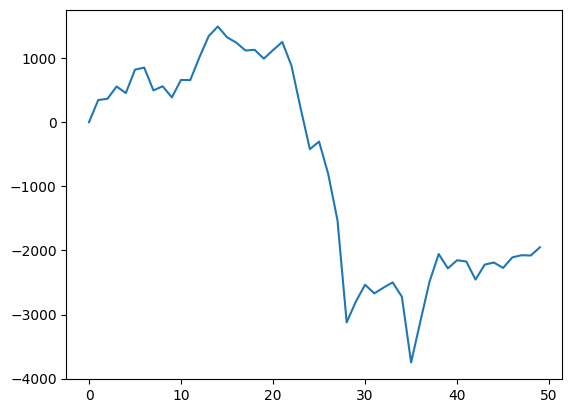

In [204]:
first_val = history.iloc[0]["Open"]
change = [price-first_val for price in history["Open"]]
# plt.plot(change)
plt.plot(change[:50])

In [272]:
# change at 10,20,30,40,50,60 Hours interval
dt_change = {}
hours, interval = 60, 5
[dt_change[f'{i + interval}h'].append(change[i+interval] - change[i]) if f'{i + interval}h' in dt_change else dt_change.update({f'{i + interval}h': [change[i+interval] - change[i]]}) for i in range(0, len(change[:60]), interval)]
dt_change = pd.DataFrame(dt_change)

In [273]:
history.iloc[0]

Open         68225.406250
High         68377.679688
Low          67790.914062
Close        67923.015625
Adj Close    67923.015625
Volume           0.000000
Name: 2024-04-05 16:00:00+00:00, dtype: float64

In [274]:
pos_news

source                                        {'id': None, 'name': 'Biztoc.com'}
author                                                              watcher.guru
title                          Cryptocurrency: 3 Trending AI Coins To Buy For...
description                    As the cryptocurrency market experiences a res...
url                                        https://biztoc.com/x/076f44f7bfc571b9
urlToImage                        https://c.biztoc.com/p/076f44f7bfc571b9/s.webp
publishedAt                                                 2024-04-05T16:40:06Z
content                        As the cryptocurrency market experiences a res...
Currency                                                                    None
paragraph                      [Prince Harry wore four medals on his chest as...
avg title sentimental                                                          0
avg sentimental sentimental                                             0.111111
avg overall sentimental     

In [281]:
interval_x_val_change = {}
sen_y_val = {}

for i in range(len(news)):
    pos_news = news.iloc[i]
    published_datetime = datetime.strptime(pos_news["publishedAt"], "%Y-%m-%dT%H:%M:%SZ")
    history = yf.download("BTC-USD", start=published_datetime, interval="1h", period="1m", progress=False)
    first_val = history.iloc[0]["Open"]
    change = [price-first_val for price in history["Open"]]
    hours, interval = 60, 5
    for i in range(0, len(change[:60]),interval):
        if f'{i + interval}h' in interval_x_val_change:
            interval_x_val_change[f'{i + interval}h'].append(change[i+interval] - change[i])
        else: interval_x_val_change.update({f'{i + interval}h': [change[i+interval] - change[i]]})
interval_x_val_change = pd.DataFrame(interval_x_val_change)

In [282]:
interval_x_val_change

,5h,10h,15h,20h,25h,30h,35h,40h,45h,50h,55h,60h
0,-66.921875,1105.859375,-501.453125,-1411.929688,-2375.531250,73.375000,443.476562,90.953125,237.359375,-5798.605469,1922.597656,884.718750
1,416.812500,-258.343750,544.390625,736.789062,383.218750,81.226562,-141.023438,31.195312,-43.656250,28.382812,2801.429688,-476.585938
2,305.898438,257.921875,-379.835938,589.609375,-647.226562,-1143.113281,-1264.187500,595.347656,-327.597656,-776.832031,663.921875,699.343750
3,-443.121094,-313.175781,364.675781,-352.902344,1070.976562,-63.882812,604.820312,-171.164062,-125.441406,-199.175781,199.976562,692.515625
4,-2375.531250,73.375000,443.476562,90.953125,237.359375,-5798.605469,1922.597656,884.718750,-497.367188,219.218750,-697.449219,1462.582031
...,...,...,...,...,...,...,...,...,...,...,...,...
91,-951.292969,-67.433594,-537.375000,-143.843750,-760.808594,1193.050781,1013.246094,-116.640625,-1275.871094,-2453.183594,1103.464844,372.750000
92,725.304688,197.023438,-1746.695312,134.750000,1179.281250,-543.859375,48.812500,407.242188,-447.710938,458.796875,182.250000,998.843750
93,369.964844,-1120.191406,3.382812,79.968750,358.847656,-149.601562,782.800781,-323.296875,66.003906,155.445312,-797.882812,-560.945312
94,358.847656,-149.601562,782.800781,-323.296875,66.003906,155.445312,-797.882812,-560.945312,-18.554688,301.777344,133.523438,-2437.355469


In [283]:
heads = ["avg title sentimental", "avg sentimental sentimental", "avg overall sentimental"]
for head in heads:
    sen_y_val.update({head: news[head]})
sen_y_val = pd.DataFrame(sen_y_val)
sen_y_val

,avg title sentimental,avg sentimental sentimental,avg overall sentimental
0,0,0.047619,0.000000
1,0,0.125000,0.312500
2,0,0.115385,0.000000
3,-1,-0.055556,-0.125000
4,0,-0.073171,-0.142857
...,...,...,...
91,1,0.133333,-0.500000
92,0,-0.083333,-0.200000
93,0,0.000000,0.000000
94,1,0.086957,-0.333333


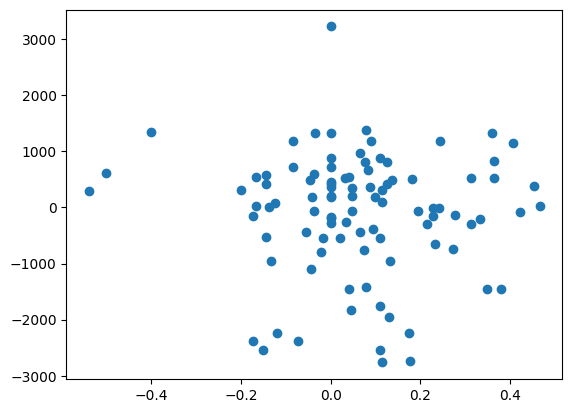

In [284]:
# do not use it the Values are opposite y&x are different
y_val, x_val = interval_x_val_change["5h"], sen_y_val["avg sentimental sentimental"]
plt.scatter(x_val, y_val)